# CNN CIFAR-10 
---
*Mark Golovatskikh*




# Imports

In [204]:
# Imports
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.metrics import Precision, Recall
import matplotlib.pyplot as plt
import seaborn as sns

  # Load data

In [251]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [164]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [165]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [166]:
# train_labels = tf.keras.utils.to_categorical(train_labels, 10)
# test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Visualise data

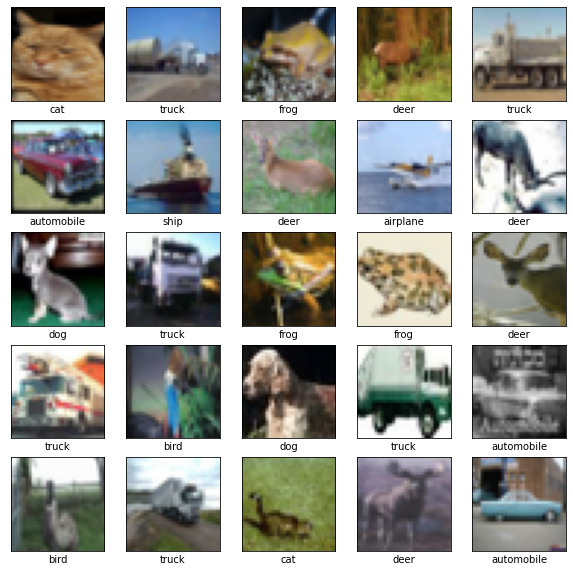

In [226]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [205]:
#split train to train & val

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.25, random_state=1)


# CREATE CNN

In [206]:
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

In [207]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)        

In [210]:
epochs = 15
learning_rate = 0.00001
batch_size = 32

# Run model

In [208]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate) ,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(val_images, val_labels), batch_size=batch_size)

Train on 37500 samples, validate on 12500 samples
Epoch 1/50
37500/37500 [==============================] - 78s 2ms/sample - loss: 1.5982 - accuracy: 0.4099 - val_loss: 1.2114 - val_accuracy: 0.5753
Epoch 2/50
37500/37500 [==============================] - 91s 2ms/sample - loss: 1.1905 - accuracy: 0.5742 - val_loss: 1.0344 - val_accuracy: 0.6286
Epoch 3/50
37500/37500 [==============================] - 91s 2ms/sample - loss: 1.0312 - accuracy: 0.6332 - val_loss: 0.9064 - val_accuracy: 0.6858
Epoch 4/50
37500/37500 [==============================] - 95s 3ms/sample - loss: 0.9351 - accuracy: 0.6705 - val_loss: 0.8166 - val_accuracy: 0.7129
Epoch 5/50
37500/37500 [==============================] - 98s 3ms/sample - loss: 0.8574 - accuracy: 0.6971 - val_loss: 0.7803 - val_accuracy: 0.7293
Epoch 6/50
37500/37500 [==============================] - 99s 3ms/sample - loss: 0.8103 - accuracy: 0.7162 - val_loss: 0.7805 - val_accuracy: 0.7277
Epoch 7/50
37500/37500 [==============================] 

KeyboardInterrupt: 

# Results

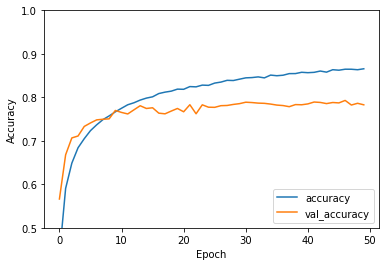

10000/1 - 6s - loss: 0.5912 - accuracy: 0.7828


In [171]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

test:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1000
           1       0.91      0.89      0.90      1000
           2       0.73      0.65      0.69      1000
           3       0.65      0.58      0.61      1000
           4       0.73      0.77      0.75      1000
           5       0.70      0.70      0.70      1000
           6       0.71      0.91      0.80      1000
           7       0.85      0.80      0.82      1000
           8       0.90      0.85      0.87      1000
           9       0.90      0.82      0.86      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.78     10000
weighted avg       0.79      0.78      0.78     10000



[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')]]

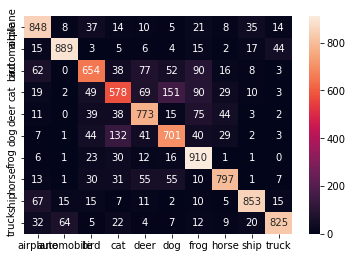

In [174]:
pred = model.predict(test_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(tf.keras.utils.to_categorical(test_labels), axis=1)
print('test:')
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
print(classification_report(Y_true, Y_pred_classes))
c.set(xticklabels=class_names, yticklabels=class_names)


# Transfer learning for CIFAR-100

## Add superclass vichicles2 - lawn-mower, rocket, streetcar, tank, tractor

In [280]:
from keras.datasets import cifar100
(train_images100, train_labels100), (test_images100, test_labels100) = cifar100.load_data(label_mode= 'fine')
# Normalize pixel values to be between 0 and 1
train_images100, test_images100 = train_images100 / 255.0, test_images100 / 255.0


In [281]:
import copy

train_imagesAll = list(copy.deepcopy(train_images))
train_labelsAll = list(copy.deepcopy(train_labels))
test_imagesAll = list(copy.deepcopy(test_images))
test_labelsAll = list(copy.deepcopy(test_labels))
print(type(train_labelsAll[0]))

<class 'numpy.ndarray'>


In [282]:
test_labels100

array([[49],
       [33],
       [72],
       ...,
       [51],
       [42],
       [70]])

In [283]:
coarse_label = [
'apple', # id 0
'aquarium_fish',
'baby',
'bear',
'beaver',
'bed',
'bee',
'beetle',
'bicycle',
'bottle',
'bowl',
'boy',
'bridge',
'bus',
'butterfly',
'camel',
'can',
'castle',
'caterpillar',
'cattle',
'chair',
'chimpanzee',
'clock',
'cloud',
'cockroach',
'couch',
'crab',
'crocodile',
'cup',
'dinosaur',
'dolphin',
'elephant',
'flatfish',
'forest',
'fox',
'girl',
'hamster',
'house',
'kangaroo',
'computer_keyboard',
'lamp',
'lawn_mower',
'leopard',
'lion',
'lizard',
'lobster',
'man',
'maple_tree',
'motorcycle',
'mountain',
'mouse',
'mushroom',
'oak_tree',
'orange',
'orchid',
'otter',
'palm_tree',
'pear',
'pickup_truck',
'pine_tree',
'plain',
'plate',
'poppy',
'porcupine',
'possum',
'rabbit',
'raccoon',
'ray',
'road',
'rocket',
'rose',
'sea',
'seal',
'shark',
'shrew',
'skunk',
'skyscraper',
'snail',
'snake',
'spider',
'squirrel',
'streetcar',
'sunflower',
'sweet_pepper',
'table',
'tank',
'telephone',
'television',
'tiger',
'tractor',
'train',
'trout',
'tulip',
'turtle',
'wardrobe',
'whale',
'willow_tree',
'wolf',
'woman',
'worm',
]

In [284]:
lawn_mower_label = coarse_label.index('lawn_mower')
rocket_label = coarse_label.index('rocket')
streetcar = coarse_label.index('streetcar')
tank = coarse_label.index('tank')
tractor = coarse_label.index('tractor')

In [285]:
vehicles2 = [lawn_mower_label, rocket_label, streetcar, tank, tractor]

In [286]:
for ind in range (len(train_images100)):
    class_label = train_labels100[ind][0]
    if class_label in vehicles2:
        train_imagesAll.append(train_images100[ind])
        train_labelsAll.append(np.array([10+vehicles2.index(class_label)], dtype=np.uint8))

for ind in range (len(test_images100)):
    class_label = test_labels100[ind][0]
    if class_label in vehicles2:
        test_imagesAll.append(test_images100[ind])
        test_labelsAll.append(np.array([10+vehicles2.index(class_label)], dtype=np.uint8))
print(np.unique(train_labelsAll))
print(np.unique(test_labelsAll))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [287]:
train_imagesAll = np.array(train_imagesAll)
train_labelsAll = np.array(train_labelsAll)
test_imagesAll = np.array(test_imagesAll)
test_labelsAll = np.array(test_labelsAll)

In [288]:
#split train to train & val

#train_imagesAll, val_imagesAll, train_labelsAll, val_labelsAll = train_test_split(train_imagesAll, train_labelsAll, test_size=0.25, random_state=1)

In [289]:
train_labelsAll.shape

(52500, 1)

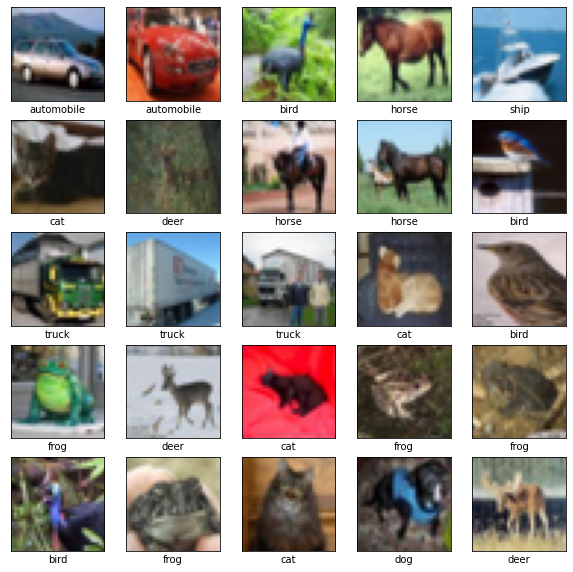

In [290]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck', 'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

plt.figure(figsize=(10,10))
n = 4
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imagesAll[n+i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labelsAll[n+i][0]])
plt.show()

## create model with replaced last layer

In [200]:
model.trainable = False

In [201]:
model_2 = models.Sequential()
for layer in model.layers[:-3]:
    model_2.add(layer)
model_2.add(layers.Dense(512, activation='relu'))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(15))
model_2.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)        

In [202]:
model_2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model_2.fit(train_imagesAll, train_labelsAll, epochs=10, validation_data=(test_imagesAll, test_labelsAll), shuffle=True, batch_size=50)

Train on 52500 samples, validate on 10500 samples
Epoch 1/10
52500/52500 [==============================] - 61s 1ms/sample - loss: 1.7662 - accuracy: 0.3678 - val_loss: 1.6076 - val_accuracy: 0.4250
Epoch 2/10
52500/52500 [==============================] - 70s 1ms/sample - loss: 1.6471 - accuracy: 0.4102 - val_loss: 1.5877 - val_accuracy: 0.4392
Epoch 3/10
52500/52500 [==============================] - 71s 1ms/sample - loss: 1.6146 - accuracy: 0.4227 - val_loss: 1.5656 - val_accuracy: 0.4498
Epoch 4/10
52500/52500 [==============================] - 66s 1ms/sample - loss: 1.5949 - accuracy: 0.4308 - val_loss: 1.5525 - val_accuracy: 0.4507
Epoch 5/10
35950/52500 [===================>..........] - ETA: 19s - loss: 1.5761 - accuracy: 0.4367

KeyboardInterrupt: 

In [156]:
history.history

{'loss': [2.4087384769439697,
  2.2524486729939777,
  2.2428985146840414,
  2.2363651991344633,
  2.2308531365167528,
  2.2255327901022777,
  2.2221379177456813,
  2.21714809085301,
  2.2138358361743746,
  2.21037639100211],
 'accuracy': [0.11474286,
  0.12824762,
  0.13849524,
  0.1448,
  0.15337142,
  0.1592,
  0.16481905,
  0.1712,
  0.17415237,
  0.17746666],
 'val_loss': [2.259453725496928,
  2.2432028615588235,
  2.233818527312506,
  2.233362746919904,
  2.225346230166299,
  2.221867025102888,
  2.215612109524863,
  2.211239170165289,
  2.2118349713370913,
  2.2155911830947512],
 'val_accuracy': [0.12523809,
  0.16085714,
  0.18771428,
  0.12733333,
  0.12457143,
  0.12714286,
  0.19314286,
  0.15009524,
  0.1512381,
  0.148]}

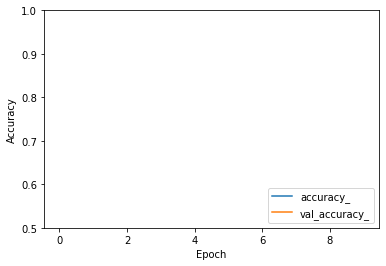

10500/1 - 3s - loss: 1.5710 - accuracy: 0.1480


In [161]:
plt.plot(history.history['accuracy'], label='accuracy_')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy_')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model_2.evaluate(test_imagesAll,  test_labelsAll, verbose=2)

In [151]:
pred = model_2.predict(test_imagesAll)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(tf.keras.utils.to_categorical(test_labelsAll), axis=1)

print(classification_report(Y_true, Y_pred_classes))
print(confusion_matrix(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.11      0.99      0.19      1000
           5       0.00      0.00      0.00      1000
           6       0.80      0.00      0.01      1000
           7       0.00      0.00      0.00      1000
           8       0.50      0.23      0.31      1000
           9       0.23      0.03      0.05      1000
          10       0.61      0.66      0.63       100
          11       0.84      0.80      0.82       100
          12       0.60      0.65      0.62       100
          13       0.57      0.42      0.48       100
          14       0.45      0.51      0.48       100

    accuracy                           0.15     10500
   macro avg       0.31      0.29      0.24     10500
weighted avg       0.18   

/Users/markgolovatskikh/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/markgolovatskikh/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/markgolovatskikh/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [152]:
np.argmax(pred, axis=1) 

array([ 4,  8,  4, ..., 14, 10, 12])

In [153]:
Y_true

array([ 3,  8,  8, ..., 14, 11, 14])

In [154]:
pred = model.predict(train_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(tf.keras.utils.to_categorical(train_labels), axis=1)
print('train:')
print(classification_report(Y_true, Y_pred_classes))
print(confusion_matrix(Y_true, Y_pred_classes))

train:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      5000
           1       0.92      0.97      0.94      5000
           2       0.85      0.78      0.81      5000
           3       0.75      0.75      0.75      5000
           4       0.84      0.84      0.84      5000
           5       0.78      0.81      0.79      5000
           6       0.91      0.92      0.92      5000
           7       0.95      0.88      0.91      5000
           8       0.91      0.97      0.94      5000
           9       0.95      0.91      0.93      5000

    accuracy                           0.87     50000
   macro avg       0.87      0.87      0.87     50000
weighted avg       0.87      0.87      0.87     50000

[[4550   47   78   39   29   13    8    9  174   53]
 [  14 4843    1    8    4    4   12    1   39   74]
 [ 235   30 3894  187  240  167  151   32   45   19]
 [  54   19  149 3769  183  572  146   33   54   21]
 [ 106    7  161  188 